<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/AutoML_h2o_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Libraries

In [ ]:
#종속 라이브러리 설치
!pip install requests
!pip install tabulate
!pip install colorama
!pip install future

In [ ]:
# 기존 h2o 삭제
!pip uninstall h2o
# h2o 설치
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Uninstalling h2o-3.32.0.4:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/h2o-3.32.0.4.dist-info/*
    /usr/local/lib/python3.6/dist-packages/h2o/*
Proceed (y/n)? y
  Successfully uninstalled h2o-3.32.0.4
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
Processing /root/.cache/pip/wheels/65/f4/0d/c9bb958d70c2e015c968cb91cbd7f1b486933056d422337d75/h2o-3.32.0.4-py2.py3-none-any.whl


# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# H20 AutoML

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,24 mins 27 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_cnsg2j
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


# Load Dataset

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['target'])
iris_df['target'] = iris_df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Prepare Data

In [ ]:
y = "target"
x = list(iris_df.columns)
x.remove(y)

In [ ]:
x, y

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'target')

In [ ]:
train, valid = train_test_split(iris_df, test_size=0.2, shuffle=True)

In [ ]:
train.shape, valid.shape

((120, 5), (30, 5))

# Model

In [ ]:
h2o_train = h2o.H2OFrame(train)
h2o_valid = h2o.H2OFrame(valid)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
h2o_train

sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
6.1,3,4.6,1.4,versicolor
5.3,3.7,1.5,0.2,setosa
6.9,3.1,5.1,2.3,virginica
4.4,3,1.3,0.2,setosa
4.8,3,1.4,0.1,setosa
4.7,3.2,1.3,0.2,setosa
5.8,2.7,4.1,1,versicolor
4.6,3.6,1,0.2,setosa
5.1,3.4,1.5,0.2,setosa
5.4,3.9,1.3,0.4,setosa


In [ ]:
automl = H2OAutoML(max_runtime_secs=30, project_name="iris_data")

In [ ]:
automl.train(x=x, y=y, training_frame=h2o_train, leaderboard_frame=h2o_valid)

AutoML progress: |███████████████
08:08:55.745: Skipping training of model GBM_5_AutoML_20210219_080845 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210219_080845.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 120.0.


█████████████████████████████████████████| 100%


# Evaluate accuracy

In [ ]:
performance = automl.leader.model_performance(h2o_valid)
performance


ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.0033119108959488368
RMSE: 0.05754920412958668
LogLoss: 0.030574216987224612
Mean Per-Class Error: 0.0
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,setosa,versicolor,virginica,Error,Rate
0,10.0,0.0,0.0,0.0,0 / 10
1,0.0,11.0,0.0,0.0,0 / 11
2,0.0,0.0,9.0,0.0,0 / 9
3,10.0,11.0,9.0,0.0,0 / 30



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0


In [ ]:
leaderboard = automl.leaderboard
leaderboard

model_id,mean_per_class_error,logloss,rmse,mse,auc,aucpr
XGBoost_grid__1_AutoML_20210219_080845_model_7,0,0.0305742,0.0575492,0.00331191,nan,nan
XRT_1_AutoML_20210219_080845,0,0.0338874,0.0876025,0.00767419,nan,nan
DeepLearning_1_AutoML_20210219_080845,0,0.0826826,0.119806,0.0143534,nan,nan
XGBoost_grid__1_AutoML_20210219_080845_model_8,0,0.0623376,0.0808832,0.00654208,nan,nan
XGBoost_2_AutoML_20210219_080845,0,0.309004,0.274742,0.0754833,nan,nan
GBM_grid__1_AutoML_20210219_080845_model_10,0,0.072078,0.0968847,0.00938664,nan,nan
XGBoost_grid__1_AutoML_20210219_080845_model_10,0,0.122678,0.130855,0.0171231,nan,nan
XGBoost_grid__1_AutoML_20210219_080845_model_12,0,0.293602,0.268276,0.0719719,nan,nan
XGBoost_1_AutoML_20210219_080845,0,0.112117,0.125012,0.0156281,nan,nan
DRF_1_AutoML_20210219_080845,0,0.0375356,0.0876006,0.00767387,nan,nan


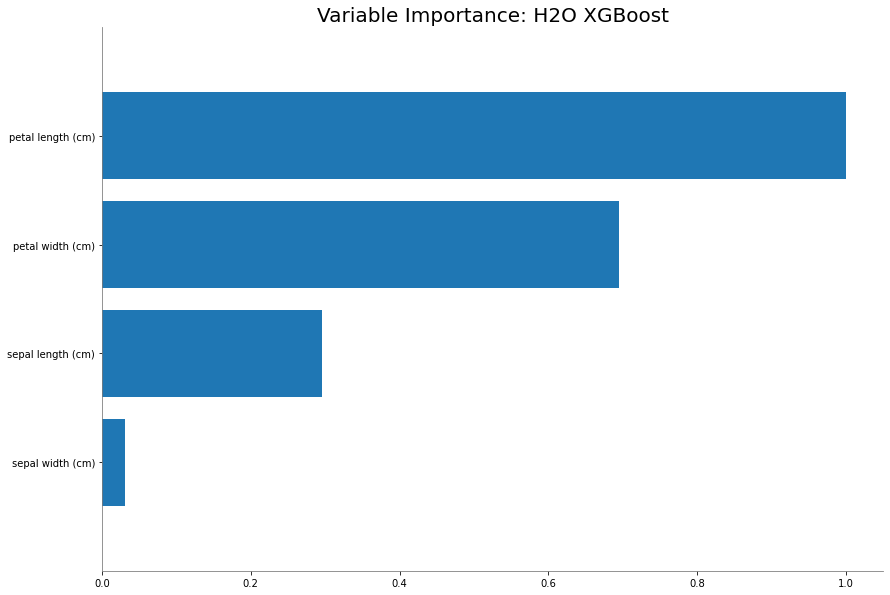

In [ ]:
automl.leader.varimp_plot()

In [ ]:
# Get model
automl_model = h2o.automl.get_automl("iris_data")

In [ ]:
# Predict vs Target
label_predict = automl_model.predict(h2o_valid)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [ ]:
print(label_predict['predict'], h2o_valid['target'])

predict
setosa
versicolor
versicolor
virginica
versicolor
virginica
setosa
versicolor
setosa
setosa


target
setosa
versicolor
versicolor
virginica
versicolor
virginica
setosa
versicolor
setosa
setosa
